In [19]:
# run me first!
import os
import pandas as pd
import matplotlib.pyplot as plt
folder = "/l/i/Catalight/rR/multiple_spectra_singlecolumn/"
file = "Cf3_5uL-TEA_ACN_473nm_2400_5s60x_200spec.txt"

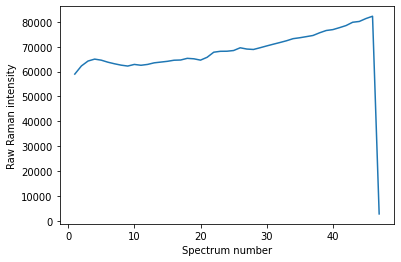

In [18]:
# select a wavenumber
def plot_wavenumber(wavenumber: int) -> None:
    path = os.path.join(folder,file)
    df = pd.read_csv(path, sep="\t",
                     names=["wavenumber", "ignore", 
                            "spectrum", "intensity"])
    df = df.pivot(index="wavenumber", columns="spectrum", 
                  values="intensity")
    select_wn = df.filter(items=[wavenumber], axis=0)
    fig, ax = plt.subplots(1, 1)
    ax.set_ylabel('Raw Raman intensity')
    ax.set_xlabel('Spectrum number')
    x = select_wn.columns.to_numpy() # get column names
    y = select_wn.to_numpy()[0,:]    # get values from the ROW
    ax.plot(x, y)
    
plot_wavenumber(1375.877)

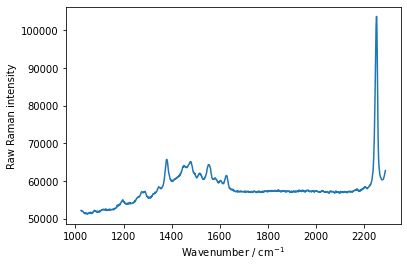

In [20]:
# select a spectrum
def plot_spectrum(spectrum: int) -> None:
    path = os.path.join(folder, file)
    df = pd.read_csv(path, sep="\t",
                     names=["wavenumber", "ignore", 
                            "spectrum", "intensity"])
    df = df.pivot(index="wavenumber", columns="spectrum", 
                  values="intensity")
    select_spectrum = df.filter(items=[spectrum], axis=1)
    fig, ax = plt.subplots(1, 1)
    ax.set_ylabel('Raw Raman intensity')
    ax.set_xlabel('Wavenumber / cm$^{-1}$')
    x = select_spectrum.index.to_numpy() # get row names
    y = select_spectrum.to_numpy()[:,0]  # get values from the COLUMN
    ax.plot(x,y)
    
plot_spectrum(5)

In [26]:
# find a wavenumber
def find_wavenumber(approx: str): # returns a NumPy array of search results
    path = os.path.join(folder, file)
    df = pd.read_csv(path, sep="\t",
                     names=["wavenumber", "ignore", 
                            "spectrum", "intensity"])
    df = df.pivot(index="wavenumber", columns="spectrum", 
                  values="intensity")
    search = df.filter(like=approx, axis=0)
    return search.index.to_numpy()

find_wavenumber("1372")

array([1372.848])